<a href="https://colab.research.google.com/github/davidofitaly/07_association_rules_projects/blob/main/01_shopping_basket_analysis_visualizing_purchase_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Data creation](#1)
3. [Data preprocessing](#2)
4. [Data visualization](#3)
5. [Algorithm Aprori](#4)
6. [Data visualization](#4)


### <a name='0'> </a> Import of libraries

In [83]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.float_format', lambda x: f'{x:.2f}')

# Print the version of the imported libraries for reference
print(f'Pandas: {pd.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Numpy: {np.__version__}')

Pandas: 2.2.2
Seaborn: 0.13.2
Numpy: 1.26.4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### <a name='1'> </a> Data creation

In [2]:
# The dataset represents a collection of shopping transactions.
# Each transaction (list) contains products purchased together.
# Products range from groceries (milk, bread, eggs) to household items (coffee, butter, chicken).
# This dataset is used for market basket analysis to find frequent itemsets and generate association rules.
dataset = [
    ['milk', 'bread', 'eggs', 'apple', 'carrot', 'chicken'],
    ['bread', 'butter', 'cheese', 'lettuce', 'tomato'],
    ['milk', 'bread', 'butter', 'yogurt', 'orange'],
    ['bread', 'butter', 'eggs', 'coffee', 'sugar', 'flour'],
    ['milk', 'butter', 'eggs', 'banana', 'lettuce'],
    ['tea', 'bread', 'butter', 'onion', 'carrot'],
    ['milk', 'chocolate', 'bread', 'eggs', 'chicken', 'coffee'],
    ['apple', 'banana', 'milk', 'bread', 'lettuce', 'orange'],
    ['butter', 'cheese', 'yogurt', 'broccoli', 'tomato'],
    ['coffee', 'bread', 'butter', 'milk', 'banana', 'flour'],
    ['milk', 'eggs', 'chocolate', 'yogurt', 'apple', 'tomato'],
    ['tea', 'coffee', 'milk', 'bread', 'lettuce', 'carrot'],
    ['bread', 'cheese', 'apple', 'onion', 'chicken'],
    ['banana', 'yogurt', 'milk', 'carrot', 'lettuce'],
    ['chocolate', 'cheese', 'bread', 'butter', 'eggs', 'flour'],
    ['apple', 'banana', 'bread', 'onion', 'broccoli'],
    ['coffee', 'tea', 'milk', 'butter', 'eggs', 'carrot'],
    ['yogurt', 'bread', 'eggs', 'lettuce', 'tomato'],
    ['tea', 'chocolate', 'apple', 'milk', 'broccoli', 'flour'],
    ['coffee', 'banana', 'butter', 'bread', 'cheese', 'chicken'],
    ['milk', 'eggs', 'lettuce', 'chicken', 'tomato', 'onion'],
    ['apple', 'carrot', 'bread', 'yogurt', 'lettuce', 'butter'],
    ['coffee', 'milk', 'butter', 'orange', 'sugar'],
    ['tea', 'bread', 'eggs', 'carrot', 'flour'],
    ['banana', 'bread', 'chocolate', 'coffee', 'lettuce'],
    ['milk', 'chicken', 'eggs', 'broccoli', 'orange'],
    ['tea', 'sugar', 'lettuce', 'apple', 'butter'],
    ['yogurt', 'bread', 'banana', 'flour', 'chocolate'],
    ['coffee', 'bread', 'onion', 'lettuce', 'milk'],
    ['apple', 'broccoli', 'chicken', 'bread', 'cheese']
]

### <a name='2'> </a> Data preprocessing

In [85]:
# Import the TransactionEncoder class from the mlxtend.preprocessing module, which is used for converting
from mlxtend.preprocessing import TransactionEncoder

baskets = dataset.copy()

encoder = TransactionEncoder()
encoder_product = encoder.fit_transform(baskets)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [86]:
# Create a DataFrame named 'df' using the one-hot encoded data generated by the TransactionEncoder.
df = pd.DataFrame(encoder_product, columns=encoder.columns_)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,apple,banana,bread,broccoli,butter,carrot,cheese,chicken,chocolate,coffee,eggs,flour,lettuce,milk,onion,orange,sugar,tea,tomato,yogurt
0,True,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False
1,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True
3,False,False,True,False,True,False,False,False,False,True,True,True,False,False,False,False,True,False,False,False
4,False,True,False,False,True,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False
5,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False
6,False,False,True,False,False,False,False,True,True,True,True,False,False,True,False,False,False,False,False,False
7,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False
8,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
9,False,True,True,False,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False


### <a name='3'> </a> Data visualization


- bar chart for the most frequently purchased products

In [87]:
top_products = df.sum().sort_values(ascending=False).reset_index().head(10)
top_products.columns = ['Product', 'Count']

fig = px.bar(top_products, x='Product', y='Count', template='ggplot2', height=600,
             title='Top 10 most purchased products')
fig.update_layout()

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



- pie chart for product share

In [88]:
fig = px.pie(top_products, values='Count', names='Product', title='Share of the most frequently purchased products', width=1000, template='ggplot2')
fig.update_traces(textinfo='label+percent', textposition='inside')
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



- heatmap

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0.5, 1.0, 'Correlation Heatmap')

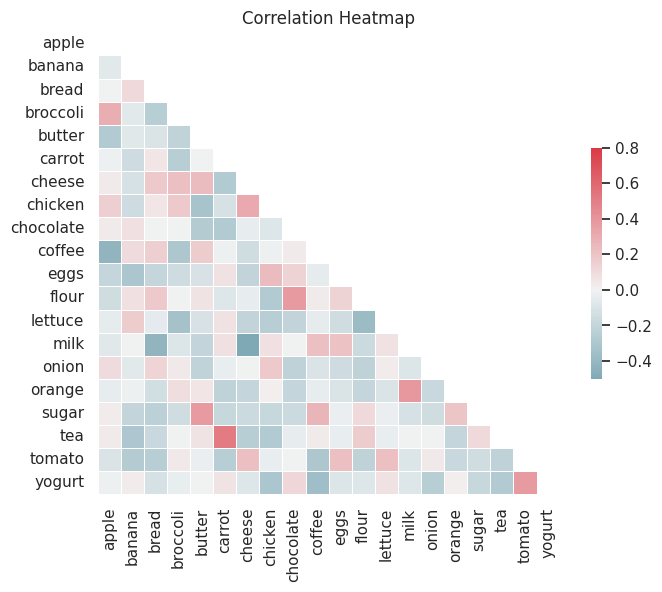

In [89]:
corr = df.corr()

sns.set(style="white")  # Set the style for seaborn plots to 'white'
mask = np.zeros_like(corr, dtype=bool)  # Create a mask for the upper triangle of the correlation matrix
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6)) # Create fiure and axis with specified size
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Create a diverging color palette
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # Draw a heatmap with the correlation matrix
plt.title('Correlation Heatmap') # Set the title of the heatmap

### <a name='4'> </a> Algorithm Aprori

In [5]:
# Importing the necessary functions from mlxtend library for frequent pattern mining
from mlxtend.frequent_patterns import apriori, association_rules

# Applying the Apriori algorithm to find frequent itemsets with a minimum support of 0.10
# This means that we are interested in itemsets that appear in at least 10% of the transaction
supports = apriori(df, min_support=0.10, use_colnames=True)
supports = supports.sort_values(by='support', ascending=False)

supports.reset_index(drop=True, inplace=True)
supports


,support,itemsets
0,0.67,(bread)
1,0.50,(milk)
2,0.43,(butter)
3,0.37,(eggs)
4,0.37,(lettuce)
...,...,...
86,0.10,"(apple, lettuce)"
87,0.10,"(eggs, flour)"
88,0.10,"(eggs, lettuce)"
89,0.10,"(flour, butter)"


In [6]:
# Iterate over different min_support values
for i in [0.01, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70]:
    supports_i = apriori(df, min_support=i, use_colnames=True)
    supports_i = supports_i.sort_values(by='support', ascending=False)
    supports_i.reset_index(drop=True, inplace=True)

    # Display the number of product sets
    print(f'Product sets for min_support = {i}: {len(supports_i)}')

    # Optionally: Display detailed information about the sets
    if not supports.empty:
        print(f'Product sets:\n{supports}\n')
    else:
        print('No product sets found.\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product sets for min_support = 0.01: 890
Product sets:
    support            itemsets
0      0.67             (bread)
1      0.50              (milk)
2      0.43            (butter)
3      0.37              (eggs)
4      0.37           (lettuce)
..      ...                 ...
86     0.10    (apple, lettuce)
87     0.10       (eggs, flour)
88     0.10     (eggs, lettuce)
89     0.10     (flour, butter)
90     0.10  (chocolate, flour)

[91 rows x 2 columns]

Product sets for min_support = 0.1: 91
Product sets:
    support            itemsets
0      0.67             (bread)
1      0.50              (milk)
2      0.43            (butter)
3      0.37              (eggs)
4      0.37           (lettuce)
..      ...                 ...
86     0.10    (apple, lettuce)
87     0.10       (eggs, flour)
88     0.10     (eggs, lettuce)
89     0.10     (flour, butter)
90     0.10  (chocolate, flour)

[91 rows x 2 columns]

Product sets for min_support = 0.2: 25
Product sets:
    support            

In [8]:
# Generating association rules from the frequent itemsets using the specified metric
# Here, we are using 'confidence' as the metric and setting a minimum threshold of 0.6.
# This means we are interested in rules that have a confidence of at least 60%.
rules = association_rules(supports, metric='confidence', min_threshold=0.6)
rules = rules.iloc[:, :-3]
rules = rules.sort_values(by='support', ascending=False)
rules.reset_index(drop=True, inplace=True)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(butter),(bread),0.43,0.67,0.27,0.62,0.92
1,(coffee),(bread),0.30,0.67,0.23,0.78,1.17
2,(eggs),(milk),0.37,0.50,0.23,0.64,1.27
3,(lettuce),(bread),0.37,0.67,0.23,0.64,0.95
4,(banana),(bread),0.27,0.67,0.20,0.75,1.12
5,(apple),(bread),0.30,0.67,0.20,0.67,1.00
6,(coffee),(milk),0.30,0.50,0.20,0.67,1.33
7,(flour),(bread),0.20,0.67,0.17,0.83,1.25
8,(chicken),(bread),0.23,0.67,0.17,0.71,1.07
9,(cheese),(bread),0.20,0.67,0.17,0.83,1.25
